In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


### To test the model I wanted to create a notebook where I can dynamically load images from a URL or File Path to see how my model performs and do some analysis

In [2]:
# Load model
model = load_model('models/first_model/model.h5')

### Enter URL here:

Probability that shoe is in the picture:
7.123283e-06


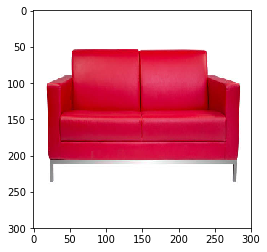

In [3]:
# Enter URL of Image here
image_url =  "https://media.istockphoto.com/photos/modern-sofa-isolated-on-white-background-picture-id843214104?k=6&m=843214104&s=612x612&w=0&h=4BDSMG3YeU4fdXlUZ-MKJ07ymVgnjE21_RRtkuKWO8s="

# File needs to be formatted first
# Download image
response = requests.get(image_url, stream=True)
img = Image.open(response.raw).convert("RGBA")
# Format
new_image = Image.new('RGB', img.size, color=(255,255,255))
new_image.paste(img, (0,0), img)
done_formatting = new_image.resize((300,300))
plt.imshow(done_formatting)

## IMPORTANT!!!! I have trained the model using the ImageDataGenerator which rescaled the image
## before feeding it to the model.
## We must now also rescale the picture before making a prediction
img_reformatted = (1/255) * np.array(done_formatting).reshape((1, 300, 300, 3))
print("Probability that shoe is in the picture:")
print(model.predict(img_reformatted)[0][0])


### Here I wanted to explore the different activation maps of some layers

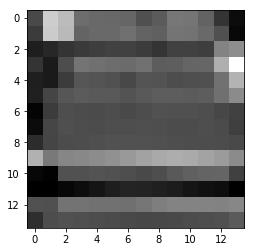

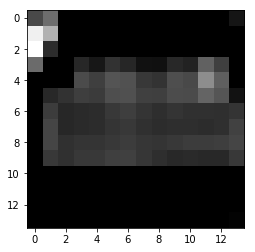

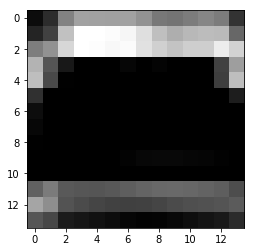

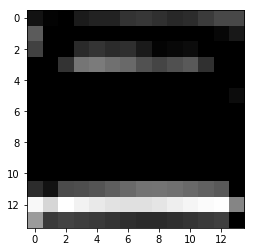

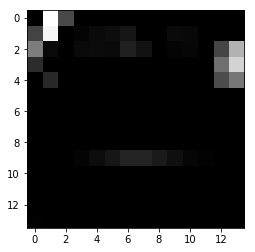

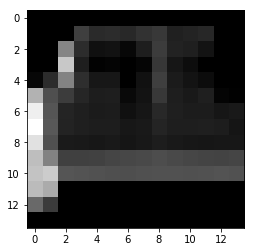

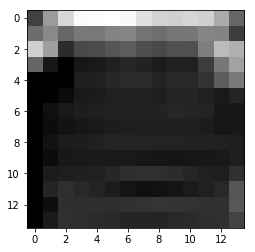

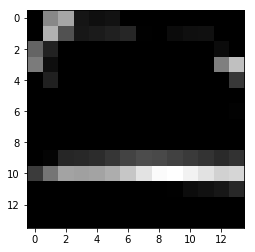

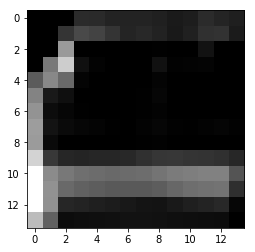

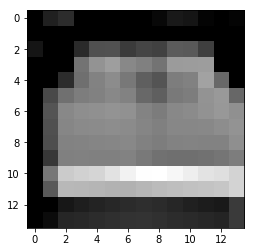

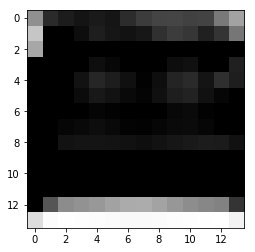

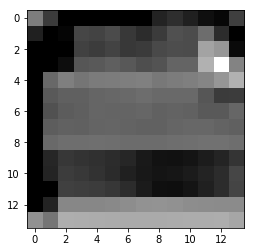

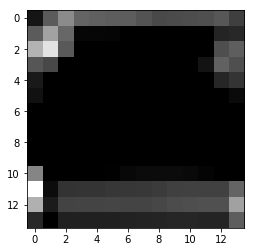

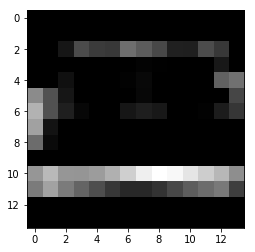

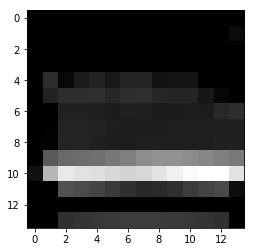

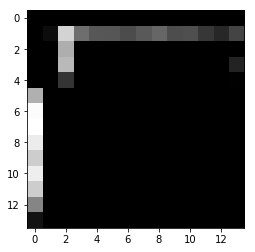

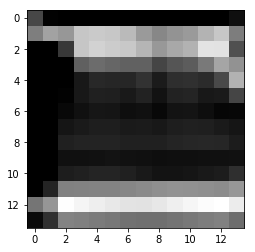

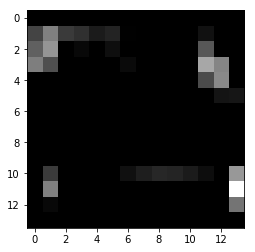

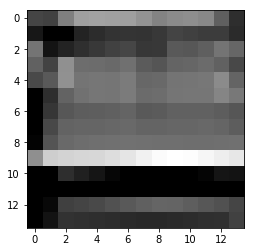

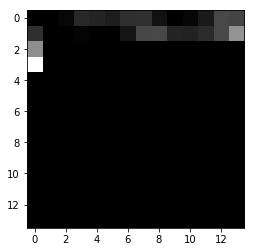

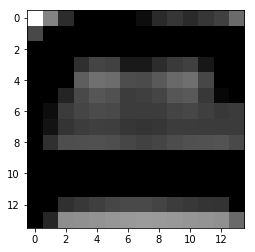

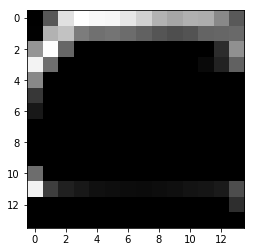

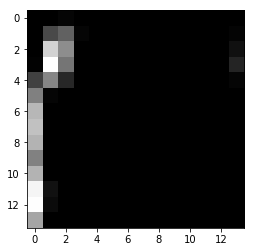

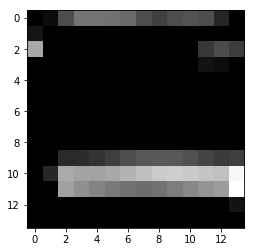

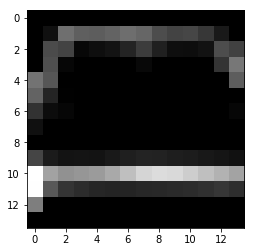

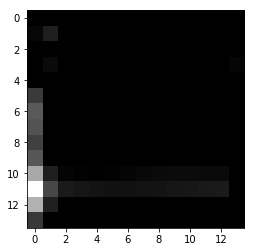

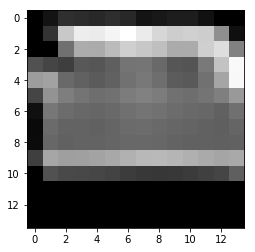

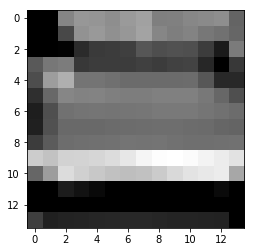

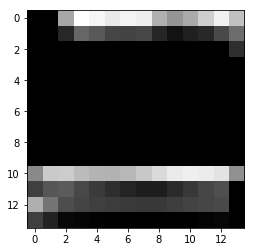

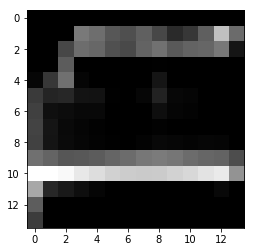

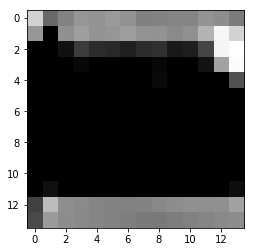

In [4]:
import scipy as sp

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]

# create a new model to output the feature maps and the predicted labels
m2 = Model(inputs=model.input, outputs=(model.layers[-7].output, model.layers[-1].output))
feature_maps, output_prob = m2.predict(img_reformatted)

ix = 1
for _ in range(31):
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure
    plt.show()

Resources:
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
https://towardsdatascience.com/multi-label-classification-and-class-activation-map-on-fashion-mnist-1454f09f5925